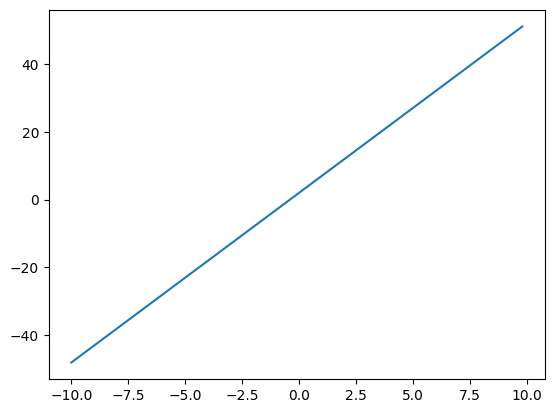

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# B0 is 2 in this case
# B1 is 5 in this case
# I put in numbers to show where they go
x = np.arange(-10., 10., 0.2)
y = 2 + 5* x
plt.plot(x, y)

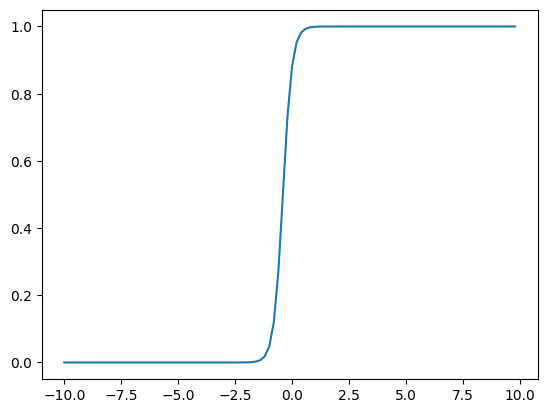

In [3]:
# Logistic Regression
# Logistic Regression uses something called a sigmoid function which bounds the output between 0 and 1. 
# When the target of what you want to predict is binary, this will make logistic regression output the probabilities of a specific class. 
# Probabilities can be converted into class predictions.
# This is how you convert a regression algorithm like linear regression to have a classification algorithm like logistic regression.
# You can think of the name logistic regression as a misleading name. 
# Despite its name, Logistic regression is an algorithm used for classification problems. 
# It is important to understand this, so it is mentioned again. Logistic regression is an algorithm used for classification problems.


# B0 is 2 in this case
# B1 is 5 in this case
# I put in numbers to show where they go
def sigmoid(x):
    s = 1 / (1 + np.exp(-(2 + 5*x)))
    return s
plt.plot(x, sigmoid(x))

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

Text(0.5, 0, 'concave points_worst')

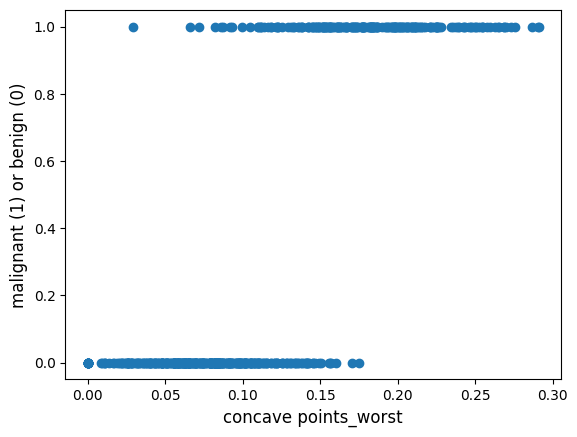

In [16]:
df = pd.read_csv('C:/Users/User/Desktop/cancer.csv')
df.head()

df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

Text(0.5, 0, 'concave points_worst')

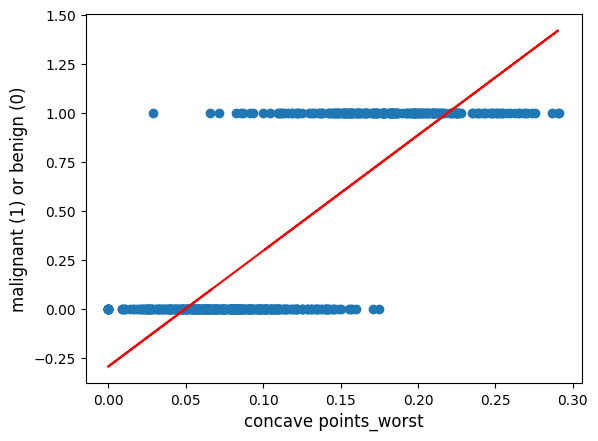

In [12]:
# Linear regression was good when we wanted to predict a continuous value. 
# This section just shows how trying to use linear regression to classify is problematic. malignant (1 in the graph above) or benign (0 in the graph below).

# Assign feature matrix and target vector
X = df[['concave points_worst']]
y = df['diagnosis']
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Make a linear regression instance
lr = LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
lr.fit(X_train,y_train)
# Get Predictions
predictions = lr.predict(X_test)
# This code shows how to graph the results comparing the prediction with the actual value
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.plot(X_test['concave points_worst'], predictions, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

In [13]:
# Logistic Regression

# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

Text(0.5, 0, 'concave points_worst')

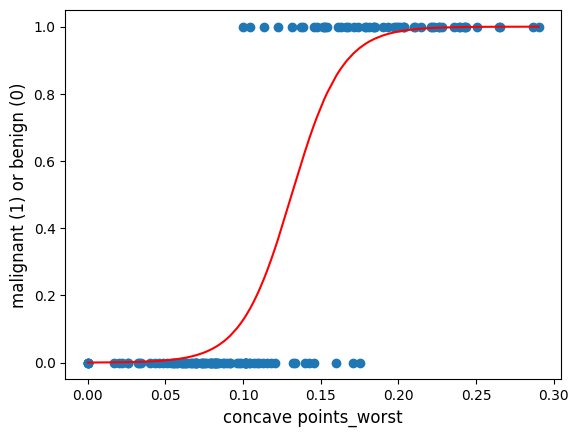

In [15]:
# This code is just to plot/visualize the predictions
example_df = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'],'diagnosis': y_test})

example_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])
plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)


# The predicted probabilities are now more calibrated so now you can predict either a 0 or a 1 depending on the of worst_concave_points.

In [ ]:
# Advantages and weaknesses of the algorithm

# Advantages
# • Able to interpret how the model makes predictions
# • Model training and predictions are relatively fast
# • It can perform well with a small number of observations.
# • No tuning is usually needed for logistic regression unless you want to regularize your model.

# Disadvantages
# • Requires feature scaling
# • Binary classification algorithm does not work for multiclass problems